In [1]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None; 
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [2]:
%reload_ext autoreload
%autoreload 2
from run_inference import *
from postprocessing_functions import *

/Users/utkarsh/GitHub/P_NS/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mcmc = None
path = f"results/prior"
mcmc = pickle_read(path)
prior_samples = infer_samples(mcmc)

In [4]:
mcmc = None
path = f"results/posterior"
mcmc = pickle_read(path)
posterior_samples = infer_samples(mcmc)
mcmc.print_summary()


                   mean       std    median      5.0%     95.0%     n_eff     r_hat
   alpha_1[0]     -1.91      0.11     -1.91     -2.09     -1.74    423.80      1.00
 alpha_chi[0]      1.59      0.41      1.54      1.00      2.13    283.68      1.00
    beta_1[0]      2.17      0.58      2.14      1.34      3.16    279.19      1.00
  beta_chi[0]      3.76      0.77      3.89      2.65      4.97    433.91      1.00
     kappa[0]      0.74      1.18      0.83     -1.15      2.54    344.82      1.00
  mix_tilt[0]      0.51      0.28      0.49      0.07      0.94    428.09      1.00
   mixture[0]      0.04      0.02      0.04      0.02      0.07     62.53      1.05
   mu_peak[0]     30.66      1.88     31.05     28.03     33.42     29.16      1.07
  sig_tilt[0]      1.86      1.16      1.75      0.13      3.56    394.80      1.00
sigma_peak[0]      4.36      2.38      3.66      2.03      7.29     31.20      1.07

Number of divergences: 0


(array([ 3.,  0.,  0.,  5.,  2.,  6., 14., 30., 35., 31., 37., 45., 61.,
        43., 31., 20., 19.,  9.,  5.,  4.]),
 array([-3.34871247, -2.9946074 , -2.64050233, -2.28639726, -1.9322922 ,
        -1.57818713, -1.22408206, -0.86997699, -0.51587193, -0.16176686,
         0.19233821,  0.54644328,  0.90054834,  1.25465341,  1.60875848,
         1.96286355,  2.31696862,  2.67107368,  3.02517875,  3.37928382,
         3.73338889]),
 <BarContainer object of 20 artists>)

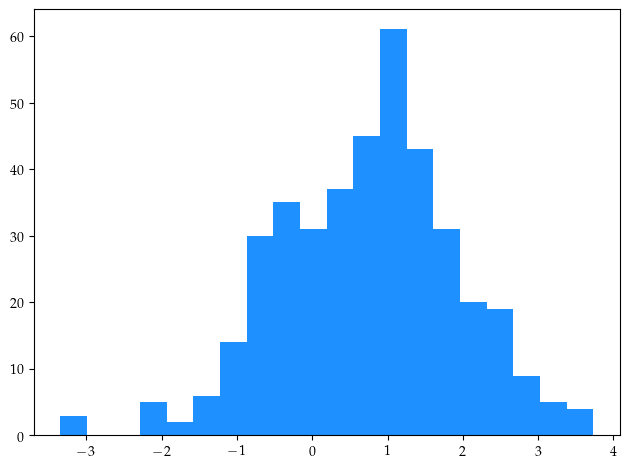

In [5]:
plt.hist(posterior_samples["kappa"], bins = 20)

In [ ]:
from config.mass1d_func import pdb_with_NG
from config.spin_func import prob_chi, prob_costilt
from config.distance_func import powerlaw_redshift

plot_p_m(posterior_samples, function=pdb_with_NG)
plot_p_pairing(posterior_samples)
plot_p_chi(posterior_samples, function=prob_chi)
plot_p_costilt(posterior_samples, function=prob_costilt)
plot_p_z(posterior_samples, function=powerlaw_redshift)
plt.show()

In [ ]:
import arviz as az
data = az.from_numpyro(mcmc)
var_names_lst = get_non_deterministic_params(mcmc)

if len(var_names_lst) >= 20:
    cut1 = var_names_lst[:20]
    cut2 = var_names_lst[20:]

    assert len(cut1) + len(cut2) == len(var_names_lst)

    az.plot_trace(data, var_names=cut1, compact=True)
    plt.savefig("results/trace1.png")
    az.plot_trace(data, var_names=cut2, compact=True)
    plt.savefig("results/trace2.png")
else:
    az.plot_trace(data, var_names=var_names_lst, compact=True)
    plt.savefig("results/trace.png")